In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
from timeit import default_timer as timer

style.use("seaborn-white")
plt.rc("figure", figsize=(20, 10))
plt.rc("font", size=20)
plt.rc("legend", fontsize=20)
warnings.filterwarnings("ignore")

In [3]:
# functions to estimate time complexity
def constant(v):
    return 1

def sum_elements(v):
    res = 0
    for i in v:
        res += i
    return res

def product_elements(v):
    res = 1
    for i in v:
        res *= i
    return res

def direct_poly(v):
    x = 1.5
    x_power = x**0
    res = 0
    for i in range(len(v)):
        res += v[i] * x_power
        x_power *= x
    return res

def horner_poly(v):
    x = 1.5
    res = 0
    for i in v[::-1]:
        res = i + res*x
    return res

def bubble_sort(v):
    n = len(v)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if v[j] > v[j + 1] :
                v[j], v[j + 1] = v[j + 1], v[j]
    return v

def quick_sort(v):
    less = []
    equal = []
    greater = []

    if len(v) > 1:
        pivot = v[0]
        for x in v:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)
        return quick_sort(less)+equal+quick_sort(greater) 
    else:  
        return v


def calcMinRun(n):
    MIN_MERGE = 32
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r

def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
            
def merge(arr, l, m, r):
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])
        
    i, j, k = 0, 0, l
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1

def tim_sort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
    size = minRun
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size
        
def matrix_multiplication(a, b):
    assert a.shape[1] == b.shape[0], "Matrices cannot be multiplied"
    c = np.zeros((a.shape[0], b.shape[1]))
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            for k in range(a.shape[1]):
                c[i, j] += a[i, k] * b[k, j]
    return c

In [32]:
# methods for measuring and plotting perfomances of functions
def measure_time_complexity(method, max_minutes=5):    
    times = list()
    exp_start = time.time()
    for n in range(1, 2001):
        start_time = time.process_time()
        try:
            for _ in range(5):
                v = np.random.random(n)
                method(v)
            times.append((time.process_time() - start_time) / 5)
        except OverflowError:
            print(f'Overflow on {n}-th step')
            break
        if time.time() - exp_start > 60 * max_minutes:
            print(f'Time limit ({max_minutes} minutes) exceeded on {n}-th step')
            break
    return times

def plot_results(times, method, approx_name, approx_predictor, poly_degree=1):
    coef = np.polynomial.polynomial.polyfit(
        predictor(np.arange(len(times))), times, poly_degree
    )
    approx_f = 0
    for i, c in enumerate(coef):
        approx_f += c * predictor(np.arange(len(times))) ** i
    plt.plot(times, label='measured time coplexity')
    plt.plot(approx_f, label=f'approximation ({approx_name})', linewidth=3)
    plt.title(f'{method.__name__} time complexity')
    plt.xlabel('Input size')
    plt.ylabel('Time')
    plt.legend()
    
def measure_and_plot(method, approx_name, approx_predictor, poly_degree=1, max_minutes=5):
    times = measure_time_complexity(method, max_minutes=max_minutes)
    plot_results(times, method, approx_name, approx_predictor, poly_degree)

In [33]:
times = assess_time_complexity(direct_poly, max_minutes=0.5)

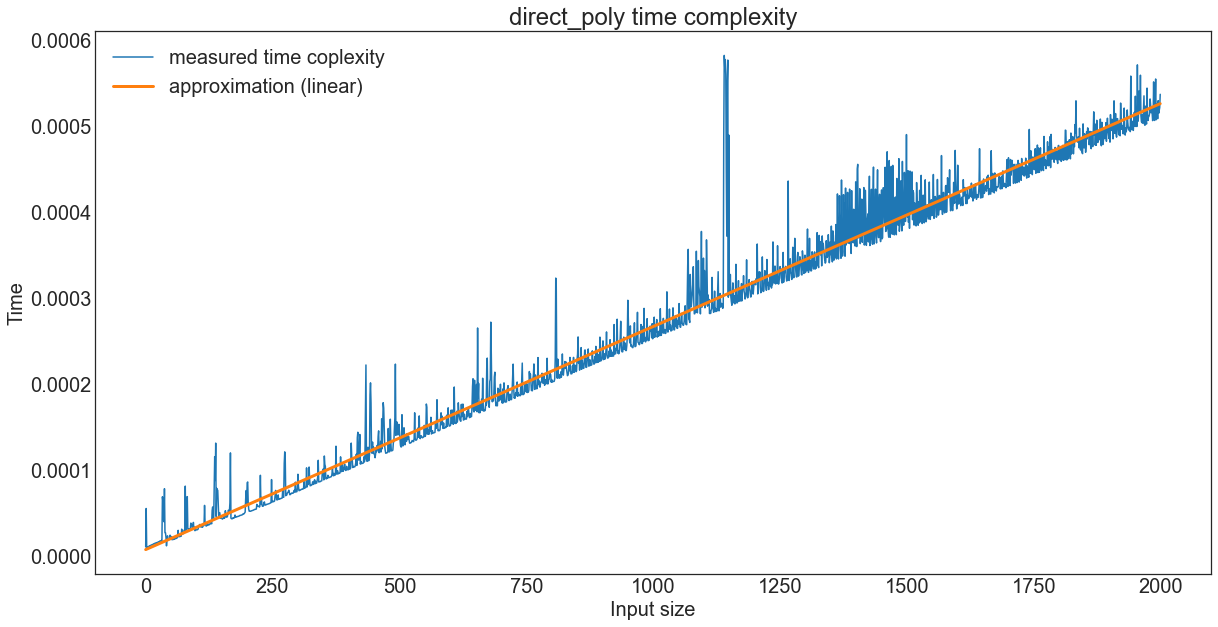

In [34]:
measure_and_plot(direct_poly, 'linear')

In [26]:
coef = np.polynomial.polynomial.polyfit(np.arange(len(times)), times, 2)

In [ ]:
plt.plot(times)
plt.plot(coef[0] + np.arange(len(times)) * coef[1] + np.arange(len(times))**2 * coef[2])

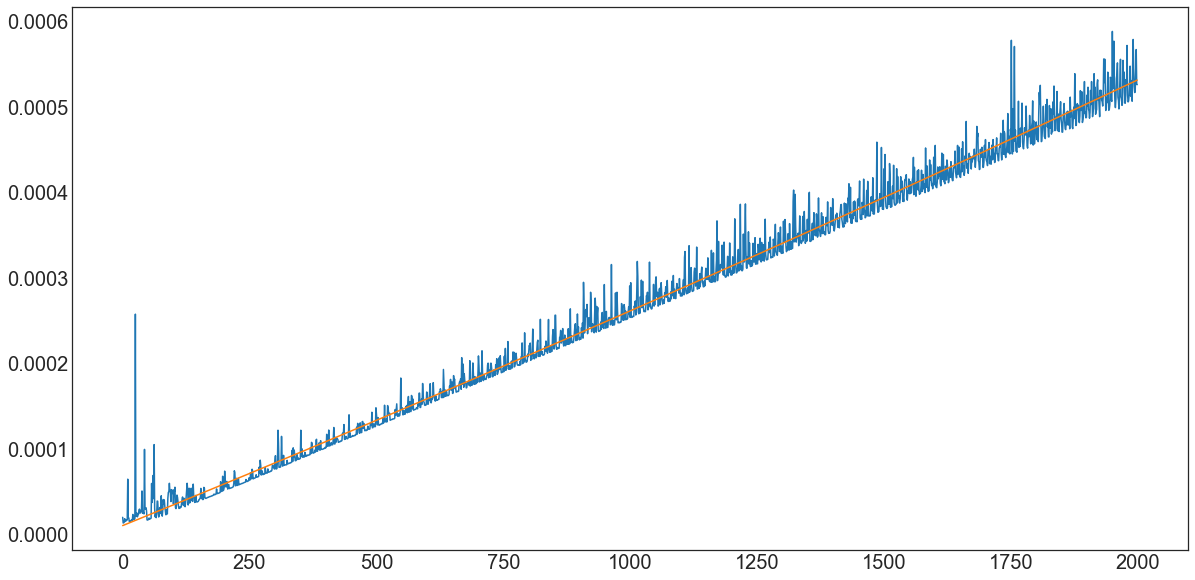

In [28]:
plot_results(times, constant)

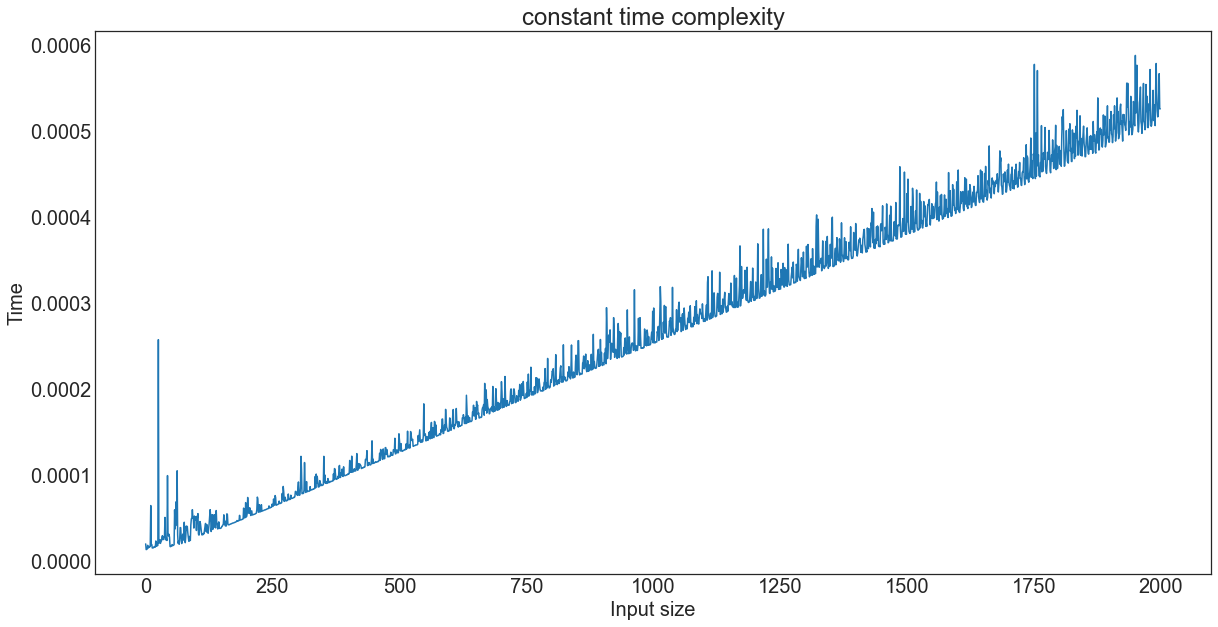

In [15]:
plot_results(times, constant)

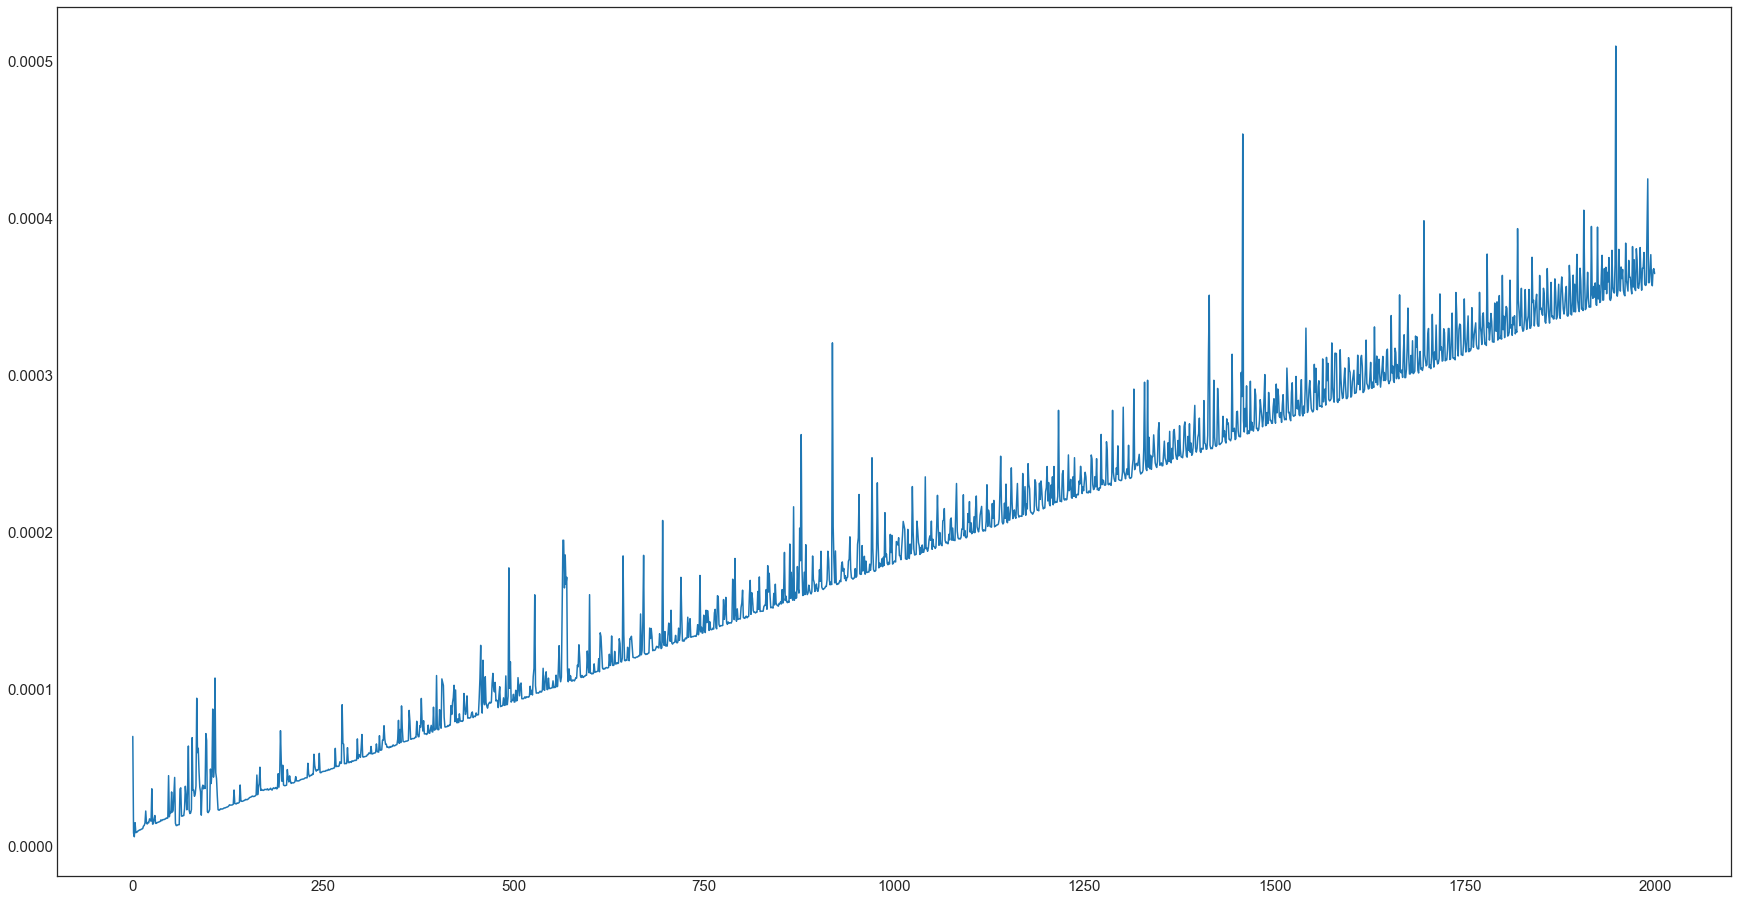

In [85]:
plt.plot(times)

In [90]:
a = np.random.random(1000)

In [92]:
all(a > 0)

True

In [81]:
direct_poly(a) == horner_poly(a)

False

In [82]:
horner_poly(a)

7.652467205382436

In [83]:
direct_poly(a)

7.652467205382437

In [21]:
timSort(a)

In [11]:
a

array([0.01894381, 0.0457181 , 0.32589748, 0.53623757, 0.87910372])